In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv3D, Flatten,MaxPooling3D,AveragePooling3D, concatenate,Input ,SpatialDropout3D,Dropout
import keras
from math import e
from sklearn.model_selection import train_test_split
from keras.models import Model
from sklearn.preprocessing import StandardScaler
from joblib import dump, load
from hyperopt import Trials, STATUS_OK, tpe
from hyperas import optim
from hyperas.distributions import choice, uniform
from sklearn.model_selection import KFold

In [2]:
inputData = xr.open_dataset('CNN_input.nc')

In [3]:
t2mTsAll=inputData.t2mTsAll
wsTsAll=inputData.wsTsAll
rhTsAll=inputData.rhTsAll
invTsAll=inputData.invTsAll
wTsAll=inputData.wTsAll
ushearTsAll=inputData.ushearTsAll
EU1DAll=inputData.EU1DAll
EU5DAll=inputData.EU5DAll
EU7DAll=inputData.EU7DAll
EU14DAll=inputData.EU14DAll
EU30DAll=inputData.EU30DAll

In [4]:
fogData = xr.open_dataset('../../../../Data/FogData/CombinedFogData_25Stations.nc')
#plt.figure(figsize=[16,8])
StackFog=fogData.fogdata.stack(a=('years','months','days'))
StackFog
dd =[];
for i in range(StackFog.years.values.shape[0]):
    dd=dd+[str(StackFog.years[i].values)+'-'+str(StackFog.months[i].values)+"-"+str(StackFog.days[i].values)]
fg = xr.Dataset({'fogdata': (('time','stations'), StackFog.values.T)}, coords={'time': pd.to_datetime(dd),'stations': fogData.stations})
yAll=fg.fogdata.sum(dim='stations').sel(time=slice('1980-1-1','2018-12-31'))
yAll=yAll/25.0

In [5]:
t2m_train,t2m_test,ws_train,ws_test,rh_train,rh_test,inv_train,inv_test, w_train, w_test,ushear_train, ushear_test,EU1D_train,EU1D_test,EU5D_train,EU5D_test,EU7D_train,EU7D_test,EU14D_train,EU14D_test,EU30D_train,EU30D_test,y_train,y_test= train_test_split( t2mTsAll,wsTsAll,rhTsAll,invTsAll, wTsAll,ushearTsAll,EU1DAll,EU5DAll,EU7DAll,EU14DAll,EU30DAll,yAll,test_size=0.20, random_state=0)

In [6]:
t2mtrain=t2m_train.values
t2mtrain=t2mtrain[:,:,:,None]
t2mtrain.shape


wstrain=ws_train.values
wstrain=wstrain[:,:,:,None]
wstrain.shape

rhtrain=rh_train.values
rhtrain=rhtrain[:,:,:,None]
rhtrain.shape


invtrain=inv_train.values
invtrain=invtrain[:,:,:,None]
invtrain.shape

wtrain=w_train.values
wtrain=wtrain[:,:,:,None]
wtrain.shape

usheartrain=ushear_train.values
usheartrain=usheartrain[:,:,:,None]
usheartrain.shape

EU1Dtrain=EU1D_train.values
EU1Dtrain=EU1Dtrain[:,:,:,None]
EU1Dtrain.shape

EU5Dtrain=EU5D_train.values
EU5Dtrain=EU5Dtrain[:,:,:,None]
EU5Dtrain.shape

EU7Dtrain=EU7D_train.values
EU7Dtrain=EU7Dtrain[:,:,:,None]
EU7Dtrain.shape

EU14Dtrain=EU14D_train.values
EU14Dtrain=EU14Dtrain[:,:,:,None]
EU14Dtrain.shape

EU30Dtrain=EU30D_train.values
EU30Dtrain=EU30Dtrain[:,:,:,None]
EU30Dtrain.shape

(1934, 18, 26, 1)

In [7]:
t2mtest=t2m_test.values
t2mtest=t2mtest[:,:,:,None]
t2mtest.shape


wstest=ws_test.values
wstest=wstest[:,:,:,None]
wstest.shape

rhtest=rh_test.values
rhtest=rhtest[:,:,:,None]
rhtest.shape


invtest=inv_test.values
invtest=invtest[:,:,:,None]
invtest.shape

wtest=w_test.values
wtest=wtest[:,:,:,None]
wtest.shape

usheartest=ushear_test.values
usheartest=usheartest[:,:,:,None]
usheartest.shape

EU1Dtest=EU1D_test.values
EU1Dtest=EU1Dtest[:,:,:,None]
EU1Dtest.shape

EU5Dtest=EU5D_test.values
EU5Dtest=EU5Dtest[:,:,:,None]
EU5Dtest.shape

EU7Dtest=EU7D_test.values
EU7Dtest=EU7Dtest[:,:,:,None]
EU7Dtest.shape

EU14Dtest=EU14D_test.values
EU14Dtest=EU14Dtest[:,:,:,None]
EU14Dtest.shape

EU30Dtest=EU30D_test.values
EU30Dtest=EU30Dtest[:,:,:,None]
EU30Dtest.shape

(484, 18, 26, 1)

In [8]:
ytrain=y_train.values
ytrain=ytrain[:,None]
ytrain.shape
ytest=y_test.values
ytest=ytest[:,None]
ytest.shape

(484, 1)

#AO1D

Epoch 1/20
61/61 [==============================] - 2s 19ms/step - loss: 0.1928 - mse: 0.0590
Epoch 2/20
61/61 [==============================] - 1s 19ms/step - loss: 0.1594 - mse: 0.0397
Epoch 3/20
61/61 [==============================] - 1s 20ms/step - loss: 0.1481 - mse: 0.0364
Epoch 4/20
61/61 [==============================] - 1s 20ms/step - loss: 0.1317 - mse: 0.0284
Epoch 5/20
61/61 [==============================] - 1s 20ms/step - loss: 0.1151 - mse: 0.0221
Epoch 6/20
61/61 [==============================] - 1s 20ms/step - loss: 0.1134 - mse: 0.0209
Epoch 7/20
61/61 [==============================] - 1s 20ms/step - loss: 0.1016 - mse: 0.0176
Epoch 8/20
61/61 [==============================] - 1s 20ms/step - loss: 0.0996 - mse: 0.0168
Epoch 9/20
61/61 [==============================] - 1s 20ms/step - loss: 0.0967 - mse: 0.0151
Epoch 10/20
61/61 [==============================] - 1s 19ms/step - loss: 0.0921 - mse: 0.0141
Epoch 11/20
61/61 [==============================] - 1s 20m

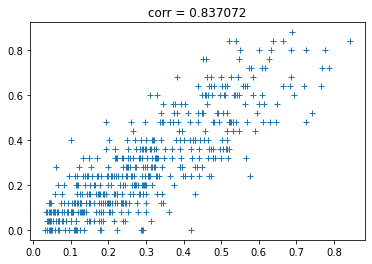

In [9]:
X_test=np.array([t2mtest,rhtest,wstest,invtest,wtest,usheartest,EU1Dtest])
#X_test=np.array([rhtest,wstest,invtest,wtest,usheartest,EUtest,eutest])
X_test.shape

X_train=np.array([t2mtrain,rhtrain,wstrain,invtrain,wtrain,usheartrain,EU1Dtrain])
#X_train=np.array([rhtrain,wstrain,invtrain,wtrain,usheartrain,EUtrain,eutrain])
X_train.shape

X_train_reshape = np.einsum('lkija->klija',X_train)
X_train_reshape.shape

X_test_reshape = np.einsum('lkija->klija',X_test)
X_test_reshape.shape


model = Sequential()
model.add(Conv3D(16, kernel_size=3, activation='relu',padding='same',
                     input_shape=(X_train_reshape.shape[1],X_train_reshape.shape[2],X_train_reshape.shape[3],1)),)
model.add(AveragePooling3D(pool_size=2,padding='same'))
model.add(Conv3D(32, kernel_size=3, activation='relu',padding='same'))
model.add(AveragePooling3D(pool_size=2,padding='same'))
model.add(Dropout(0.2))
model.add(Conv3D(64, kernel_size=3, activation='relu',padding='same'))
model.add(AveragePooling3D(pool_size=2,padding='same'))
model.add(Dropout(0.2))


model.add(Flatten())

model.add(Dense(32, activation='relu'))
model.add(Dense(units=1, activation = 'linear'))

adam = keras.optimizers.Adam(lr=0.01)
model.compile(optimizer='adam', loss='mae',  metrics='mse')
history = model.fit(X_train_reshape, y_train, epochs=20)
yy_test = model.predict(X_test_reshape)
    
test_corr = np.corrcoef(yy_test[:,0],y_test)[0,1]
plt.title('corr = %f'%test_corr)

plt.plot(yy_test,y_test,'+')
scores = model.evaluate(X_test_reshape, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

#AO5D

Epoch 1/20
61/61 [==============================] - 3s 21ms/step - loss: 0.1912 - mse: 0.0572
Epoch 2/20
61/61 [==============================] - 1s 19ms/step - loss: 0.1662 - mse: 0.0429
Epoch 3/20
61/61 [==============================] - 1s 20ms/step - loss: 0.1451 - mse: 0.0333
Epoch 4/20
61/61 [==============================] - 1s 19ms/step - loss: 0.1252 - mse: 0.0254
Epoch 5/20
61/61 [==============================] - 1s 19ms/step - loss: 0.1085 - mse: 0.0203
Epoch 6/20
61/61 [==============================] - 1s 19ms/step - loss: 0.1098 - mse: 0.0200
Epoch 7/20
61/61 [==============================] - 1s 19ms/step - loss: 0.0975 - mse: 0.0161
Epoch 8/20
61/61 [==============================] - 1s 19ms/step - loss: 0.0987 - mse: 0.0164
Epoch 9/20
61/61 [==============================] - 1s 18ms/step - loss: 0.0974 - mse: 0.0156
Epoch 10/20
61/61 [==============================] - 1s 19ms/step - loss: 0.0888 - mse: 0.0136
Epoch 11/20
61/61 [==============================] - 2s 27m

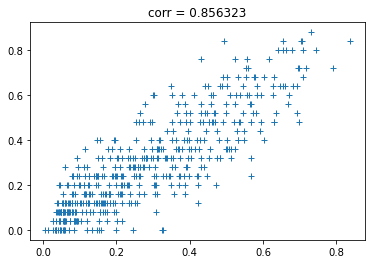

In [10]:
X_test=np.array([t2mtest,rhtest,wstest,invtest,wtest,usheartest,EU5Dtest])
#X_test=np.array([rhtest,wstest,invtest,wtest,usheartest,EUtest,eutest])
X_test.shape

X_train=np.array([t2mtrain,rhtrain,wstrain,invtrain,wtrain,usheartrain,EU5Dtrain])
#X_train=np.array([rhtrain,wstrain,invtrain,wtrain,usheartrain,EUtrain,eutrain])
X_train.shape

X_train_reshape = np.einsum('lkija->klija',X_train)
X_train_reshape.shape

X_test_reshape = np.einsum('lkija->klija',X_test)
X_test_reshape.shape


model = Sequential()
model.add(Conv3D(16, kernel_size=3, activation='relu',padding='same',
                     input_shape=(X_train_reshape.shape[1],X_train_reshape.shape[2],X_train_reshape.shape[3],1)),)
model.add(AveragePooling3D(pool_size=2,padding='same'))
model.add(Conv3D(32, kernel_size=3, activation='relu',padding='same'))
model.add(AveragePooling3D(pool_size=2,padding='same'))
model.add(Dropout(0.2))
model.add(Conv3D(64, kernel_size=3, activation='relu',padding='same'))
model.add(AveragePooling3D(pool_size=2,padding='same'))
model.add(Dropout(0.2))


model.add(Flatten())

model.add(Dense(32, activation='relu'))
model.add(Dense(units=1, activation = 'linear'))

adam = keras.optimizers.Adam(lr=0.01)
model.compile(optimizer='adam', loss='mae',  metrics='mse')
history = model.fit(X_train_reshape, y_train, epochs=20)
yy_test = model.predict(X_test_reshape)
    
test_corr = np.corrcoef(yy_test[:,0],y_test)[0,1]
plt.title('corr = %f'%test_corr)

plt.plot(yy_test,y_test,'+')
scores = model.evaluate(X_test_reshape, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

#AO7D

Epoch 1/20
61/61 [==============================] - 2s 20ms/step - loss: 0.1963 - mse: 0.0597
Epoch 2/20
61/61 [==============================] - 1s 19ms/step - loss: 0.1790 - mse: 0.0477
Epoch 3/20
61/61 [==============================] - 1s 21ms/step - loss: 0.1613 - mse: 0.0413
Epoch 4/20
61/61 [==============================] - 1s 18ms/step - loss: 0.1535 - mse: 0.0387
Epoch 5/20
61/61 [==============================] - 1s 19ms/step - loss: 0.1182 - mse: 0.0234
Epoch 6/20
61/61 [==============================] - 1s 19ms/step - loss: 0.1123 - mse: 0.0215
Epoch 7/20
61/61 [==============================] - 1s 19ms/step - loss: 0.1091 - mse: 0.0209
Epoch 8/20
61/61 [==============================] - 1s 19ms/step - loss: 0.1007 - mse: 0.0173
Epoch 9/20
61/61 [==============================] - 1s 19ms/step - loss: 0.0964 - mse: 0.0155
Epoch 10/20
61/61 [==============================] - 1s 19ms/step - loss: 0.0954 - mse: 0.0159
Epoch 11/20
61/61 [==============================] - 1s 18m

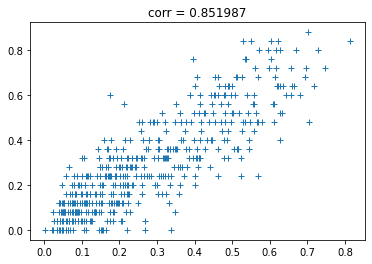

In [11]:
X_test=np.array([t2mtest,rhtest,wstest,invtest,wtest,usheartest,EU7Dtest])
#X_test=np.array([rhtest,wstest,invtest,wtest,usheartest,EUtest,eutest])
X_test.shape

X_train=np.array([t2mtrain,rhtrain,wstrain,invtrain,wtrain,usheartrain,EU7Dtrain])
#X_train=np.array([rhtrain,wstrain,invtrain,wtrain,usheartrain,EUtrain,eutrain])
X_train.shape

X_train_reshape = np.einsum('lkija->klija',X_train)
X_train_reshape.shape

X_test_reshape = np.einsum('lkija->klija',X_test)
X_test_reshape.shape


model = Sequential()
model.add(Conv3D(16, kernel_size=3, activation='relu',padding='same',
                     input_shape=(X_train_reshape.shape[1],X_train_reshape.shape[2],X_train_reshape.shape[3],1)),)
model.add(AveragePooling3D(pool_size=2,padding='same'))
model.add(Conv3D(32, kernel_size=3, activation='relu',padding='same'))
model.add(AveragePooling3D(pool_size=2,padding='same'))
model.add(Dropout(0.2))
model.add(Conv3D(64, kernel_size=3, activation='relu',padding='same'))
model.add(AveragePooling3D(pool_size=2,padding='same'))
model.add(Dropout(0.2))


model.add(Flatten())

model.add(Dense(32, activation='relu'))
model.add(Dense(units=1, activation = 'linear'))

adam = keras.optimizers.Adam(lr=0.01)
model.compile(optimizer='adam', loss='mae',  metrics='mse')
history = model.fit(X_train_reshape, y_train, epochs=20)
yy_test = model.predict(X_test_reshape)
    
test_corr = np.corrcoef(yy_test[:,0],y_test)[0,1]
plt.title('corr = %f'%test_corr)

plt.plot(yy_test,y_test,'+')
scores = model.evaluate(X_test_reshape, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

#AO14D

Epoch 1/20
61/61 [==============================] - 2s 19ms/step - loss: 0.1936 - mse: 0.0607
Epoch 2/20
61/61 [==============================] - 1s 20ms/step - loss: 0.1739 - mse: 0.0462
Epoch 3/20
61/61 [==============================] - 1s 19ms/step - loss: 0.1534 - mse: 0.0380
Epoch 4/20
61/61 [==============================] - 1s 18ms/step - loss: 0.1323 - mse: 0.0286
Epoch 5/20
61/61 [==============================] - 1s 20ms/step - loss: 0.1199 - mse: 0.0244
Epoch 6/20
61/61 [==============================] - 1s 20ms/step - loss: 0.1113 - mse: 0.0206
Epoch 7/20
61/61 [==============================] - 1s 20ms/step - loss: 0.1047 - mse: 0.0186
Epoch 8/20
61/61 [==============================] - 1s 20ms/step - loss: 0.1013 - mse: 0.0171
Epoch 9/20
61/61 [==============================] - 1s 19ms/step - loss: 0.0978 - mse: 0.0163
Epoch 10/20
61/61 [==============================] - 1s 19ms/step - loss: 0.0944 - mse: 0.0149
Epoch 11/20
61/61 [==============================] - 1s 19m

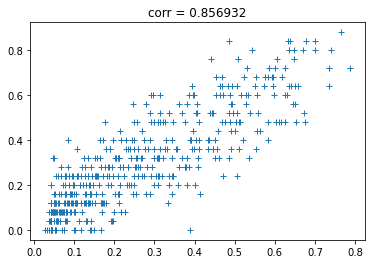

In [12]:
X_test=np.array([t2mtest,rhtest,wstest,invtest,wtest,usheartest,EU14Dtest])
#X_test=np.array([rhtest,wstest,invtest,wtest,usheartest,EUtest,eutest])
X_test.shape

X_train=np.array([t2mtrain,rhtrain,wstrain,invtrain,wtrain,usheartrain,EU14Dtrain])
#X_train=np.array([rhtrain,wstrain,invtrain,wtrain,usheartrain,EUtrain,eutrain])
X_train.shape

X_train_reshape = np.einsum('lkija->klija',X_train)
X_train_reshape.shape

X_test_reshape = np.einsum('lkija->klija',X_test)
X_test_reshape.shape


model = Sequential()
model.add(Conv3D(16, kernel_size=3, activation='relu',padding='same',
                     input_shape=(X_train_reshape.shape[1],X_train_reshape.shape[2],X_train_reshape.shape[3],1)),)
model.add(AveragePooling3D(pool_size=2,padding='same'))
model.add(Conv3D(32, kernel_size=3, activation='relu',padding='same'))
model.add(AveragePooling3D(pool_size=2,padding='same'))
model.add(Dropout(0.2))
model.add(Conv3D(64, kernel_size=3, activation='relu',padding='same'))
model.add(AveragePooling3D(pool_size=2,padding='same'))
model.add(Dropout(0.2))


model.add(Flatten())

model.add(Dense(32, activation='relu'))
model.add(Dense(units=1, activation = 'linear'))

adam = keras.optimizers.Adam(lr=0.01)
model.compile(optimizer='adam', loss='mae',  metrics='mse')
history = model.fit(X_train_reshape, y_train, epochs=20)
yy_test = model.predict(X_test_reshape)
    
test_corr = np.corrcoef(yy_test[:,0],y_test)[0,1]
plt.title('corr = %f'%test_corr)

plt.plot(yy_test,y_test,'+')
scores = model.evaluate(X_test_reshape, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

#AO30D

Epoch 1/20
61/61 [==============================] - 2s 20ms/step - loss: 0.1872 - mse: 0.0567
Epoch 2/20
61/61 [==============================] - 1s 18ms/step - loss: 0.1716 - mse: 0.0450
Epoch 3/20
61/61 [==============================] - 1s 19ms/step - loss: 0.1484 - mse: 0.0355
Epoch 4/20
61/61 [==============================] - 1s 19ms/step - loss: 0.1232 - mse: 0.0252
Epoch 5/20
61/61 [==============================] - 1s 19ms/step - loss: 0.1280 - mse: 0.0279
Epoch 6/20
61/61 [==============================] - 1s 19ms/step - loss: 0.1045 - mse: 0.0188
Epoch 7/20
61/61 [==============================] - 1s 19ms/step - loss: 0.0974 - mse: 0.0163
Epoch 8/20
61/61 [==============================] - 1s 19ms/step - loss: 0.0963 - mse: 0.0155
Epoch 9/20
61/61 [==============================] - 1s 18ms/step - loss: 0.0934 - mse: 0.0144
Epoch 10/20
61/61 [==============================] - 1s 19ms/step - loss: 0.0898 - mse: 0.0136
Epoch 11/20
61/61 [==============================] - 1s 19m

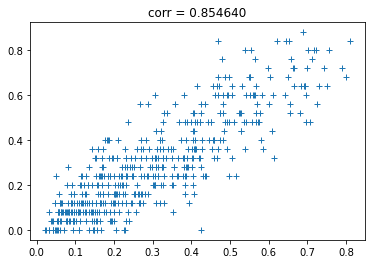

In [13]:
X_test=np.array([t2mtest,rhtest,wstest,invtest,wtest,usheartest,EU30Dtest])
#X_test=np.array([rhtest,wstest,invtest,wtest,usheartest,EUtest,eutest])
X_test.shape

X_train=np.array([t2mtrain,rhtrain,wstrain,invtrain,wtrain,usheartrain,EU30Dtrain])
#X_train=np.array([rhtrain,wstrain,invtrain,wtrain,usheartrain,EUtrain,eutrain])
X_train.shape

X_train_reshape = np.einsum('lkija->klija',X_train)
X_train_reshape.shape

X_test_reshape = np.einsum('lkija->klija',X_test)
X_test_reshape.shape


model = Sequential()
model.add(Conv3D(16, kernel_size=3, activation='relu',padding='same',
                     input_shape=(X_train_reshape.shape[1],X_train_reshape.shape[2],X_train_reshape.shape[3],1)),)
model.add(AveragePooling3D(pool_size=2,padding='same'))
model.add(Conv3D(32, kernel_size=3, activation='relu',padding='same'))
model.add(AveragePooling3D(pool_size=2,padding='same'))
model.add(Dropout(0.2))
model.add(Conv3D(64, kernel_size=3, activation='relu',padding='same'))
model.add(AveragePooling3D(pool_size=2,padding='same'))
model.add(Dropout(0.2))


model.add(Flatten())

model.add(Dense(32, activation='relu'))
model.add(Dense(units=1, activation = 'linear'))

adam = keras.optimizers.Adam(lr=0.01)
model.compile(optimizer='adam', loss='mae',  metrics='mse')
history = model.fit(X_train_reshape, y_train, epochs=20)
yy_test = model.predict(X_test_reshape)
    
test_corr = np.corrcoef(yy_test[:,0],y_test)[0,1]
plt.title('corr = %f'%test_corr)

plt.plot(yy_test,y_test,'+')
scores = model.evaluate(X_test_reshape, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))